In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori, association_rules

In [20]:
# filter out depraication warnings
import warnings
warnings.filterwarnings("ignore")

## Data Creation

In [21]:
credit_scores = np.random.randint(400, 850, size=25)
monthly_income = np.random.randint(2000, 10000, size=25)
monthly_expenditure = np.random.randint(100, 1000, size=25)

df = pd.DataFrame({'credit_scores': credit_scores, 'monthly_income': monthly_income, 'monthly_expenditure': monthly_expenditure})

df.head(25)

,credit_scores,monthly_income,monthly_expenditure
0,785,4094,299
1,781,8170,219
2,531,7534,542
3,735,2262,256
4,663,3247,894
5,599,5407,705
6,757,9435,333
7,659,9122,182
8,749,5034,710
9,552,3889,888


In [22]:
labels = [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]
len(labels)

25

In [23]:
df['apprved'] = labels

df.head(25)

,credit_scores,monthly_income,monthly_expenditure,apprved
0,785,4094,299,1
1,781,8170,219,1
2,531,7534,542,1
3,735,2262,256,0
4,663,3247,894,0
5,599,5407,705,1
6,757,9435,333,1
7,659,9122,182,0
8,749,5034,710,1
9,552,3889,888,0


In [24]:
X = df.drop('apprved', axis=1)
y = df['apprved']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42, max_depth=3)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

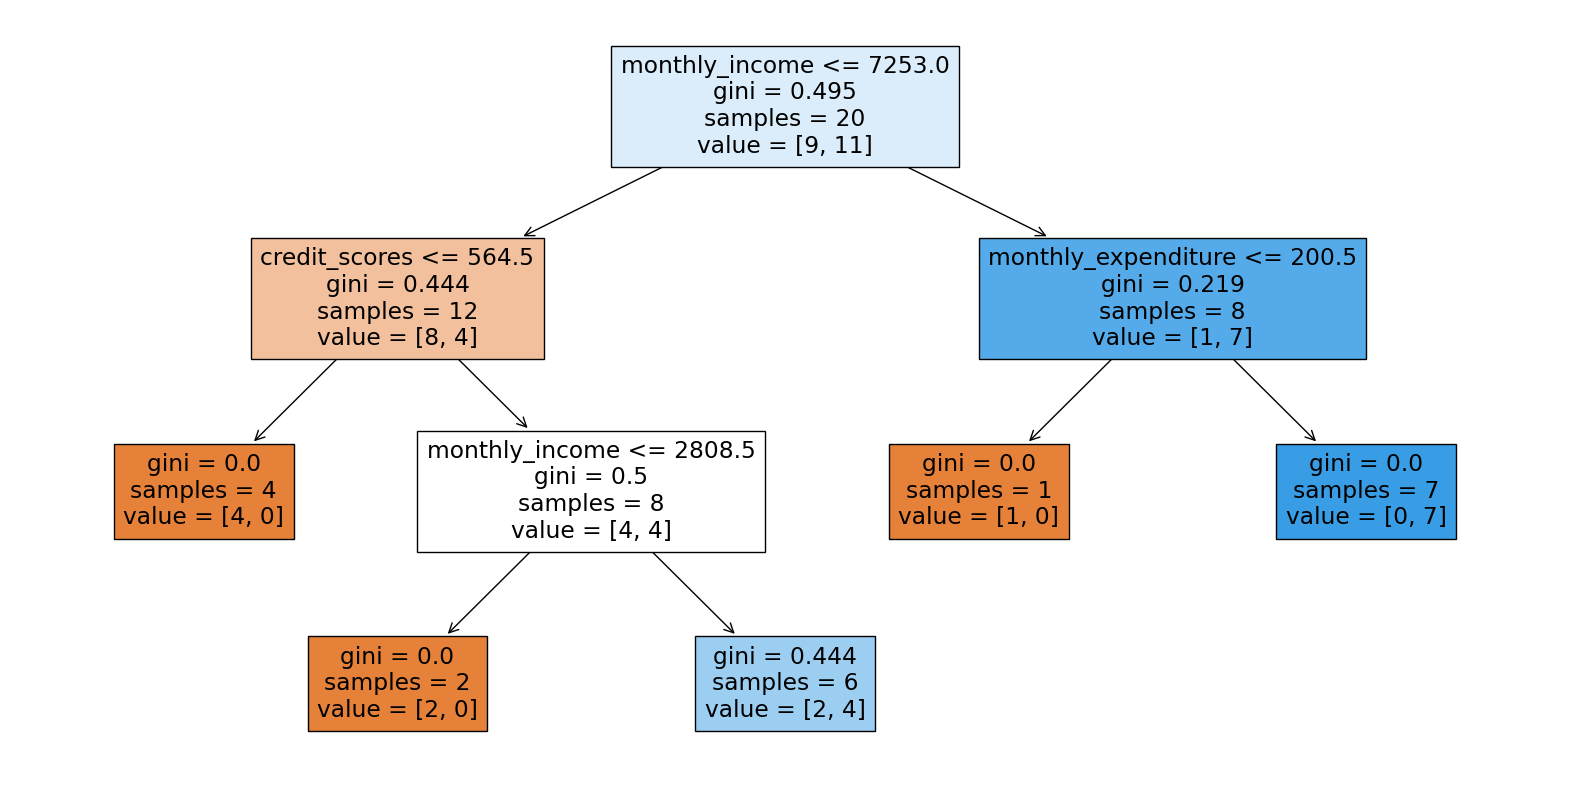

In [26]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=df.columns)
plt.show()

In [27]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print(f'Training score: {train_score}')
print(f'Test score: {test_score}')

Training score: 0.9
Test score: 0.6


I used a decision tree to base my predictions due to it's great interpretability. It can be seen in the figure above that whether or not the monthly income is less than or equal to 4647.0 had the highest information gain of any partition. On the left subtree, we continue by partitioning the data based on whether or not their monthly expenditure is less than or equal to $909.00. On the right subtree, we instead check if the monthly income is less than or equal to $7288.00.

In [32]:
amazon_items = ["headphones", "laptop", "basketball", "ibruprofen"]

headphone_purchase = np.random.randint(0, 2, size=25)
laptop_purchase = np.random.randint(0, 2, size=25)
basketball_purchase = np.random.randint(0, 2, size=25)
ibruprofen_purchase = np.random.randint(0, 2, size=25)

df = pd.DataFrame({'headphones': headphone_purchase, 'laptop': laptop_purchase, 'basketball': basketball_purchase, 'ibruprofen': ibruprofen_purchase})
df.head(25)

,headphones,laptop,basketball,ibruprofen
0,1,0,1,0
1,1,1,0,0
2,1,0,0,1
3,1,0,0,0
4,1,1,0,0
5,1,1,0,1
6,0,1,0,0
7,0,1,0,1
8,0,0,1,1
9,0,1,0,1


In [33]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

In [34]:
print(rules)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [35]:
print(frequent_itemsets)

   support                  itemsets
0     0.60              (headphones)
1     0.48                  (laptop)
2     0.48              (basketball)
3     0.52              (ibruprofen)
4     0.20      (headphones, laptop)
5     0.24  (basketball, headphones)
6     0.28  (ibruprofen, headphones)
7     0.20      (basketball, laptop)
8     0.20      (ibruprofen, laptop)
9     0.20  (basketball, ibruprofen)
